# Recurrent Neural network example

This is multilayer feed forward network with a Recurrent layer. Help observing the inner workingsof backpropagation through time.


In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Module with the neural net classes 
import DNN
import Solvers

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


We wil demonstrate the nonlinear representation capabilities fot the multilayer feedforward network with the XOR problem. First, let's create a small dataset with samples from positive and negative classes.  

(100, 2)


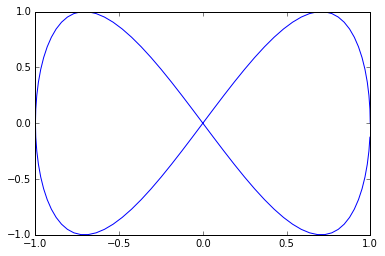

In [2]:
N = 100
T = np.ndarray((N, 1), buffer=np.array(range(N), dtype=np.float))
data = np.concatenate((np.cos(2*np.pi*T/N), np.sin(4*np.pi*T/N)), axis=1)
target = np.concatenate((data[1:, ::], data[0:1,::]), axis=0)
print  target.shape
plt.plot(data[:,0], data[:,1])

In [3]:
# instantiate an empty network  
my_net = DNN.Net()
# add layers to my_net in a bottom up fashion
my_net.addLayer(DNN.RNNLayer(n_in=2, n_out=2, n_hid=6, hid_activation='tanh', out_activation='tanh'))


In [4]:

# create solver object for training the feedforward network 
solver_params = {'lr_rate': 0.0001,  \
                 'momentum': 0.9}  
my_solver = DNN.SGDSolver(solver_params)
#my_solver = DNN.NAGSolver(solver_params)
#my_solver = DNN.RMSPropSolver(solver_params)
#my_solver = DNN.AdaGradSolver(solver_params)



In [5]:
# instantiate a NetTrainer to learn parameters of my_net using the my_solver 
train_params = {'net': my_net, \
                'loss_func': 'mse', \
                'batch_size': 10,  \
                'max_iter': 100000, \
                'train_data': data, \
                'label_data': target, \
                'solver': my_solver, \
                'print_interval': 10000}
my_trainer = DNN.NetTrainer(train_params)

In [6]:
my_trainer.train()

Iteration 0, objective = 0.553820
Iteration 10000, objective = 0.034542
Iteration 20000, objective = 0.029383
Iteration 30000, objective = 0.034547
Iteration 40000, objective = 0.051802
Iteration 50000, objective = 0.098186
Iteration 60000, objective = 0.059422
Iteration 70000, objective = 0.046157
Iteration 80000, objective = 0.044158
Iteration 90000, objective = 0.091461


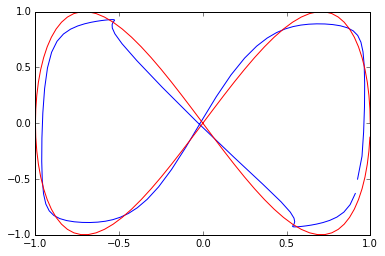

In [7]:
my_net.forward(data)
pred = my_net.Xout
## plot data point with the predicted labels
plt.plot(pred[:, 0], pred[:, 1])
plt.hold('on')
plt.plot(data[:, 0], data[:, 1], 'r')
plt.show()